<a href="https://colab.research.google.com/github/GallardoCoriaMarcelo/Laboratorios/blob/main/1er_Parcial_Ej2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

#Importar pandas
import pandas as pd

Cargar el Dataset

Para optimizar el uso del DataSet se ha ordenado de forma aleatoria los datos, para que sean incluidos tanto resultados de 1 y de 0 en la misma proporcion.

Se carga el dataset directamente desde GitHub con la librería PANDAS

Se selecciona solo el 80% de los datos para entrenar el modelo

In [3]:
df = pd.read_csv("creditcard.csv")
df.head()

#Selecciona el 80% del dataset para entrenamiento
porcentaje = 0.8
data_muestra = df.sample(frac=porcentaje, random_state=42)

df.head()
y = data_muestra.iloc[:, -1] # Última columna como y
X = data_muestra.iloc[:, :-1] # Todas las columnas excepto la última como X

print(X)
print(y)

           Time        V1        V2        V3        V4        V5        V6  \
19735   30513.0 -0.389655  1.110866 -0.465291 -0.633098  1.239639 -0.702517   
131416  79593.0  1.243228 -0.500471 -0.317800 -0.522898 -0.816941 -1.228223   
135936  81469.0 -1.086241  0.292079  0.432014 -0.654781  0.499160 -0.561768   
137780  82317.0  1.258969 -0.236336 -0.677422 -0.526728  1.680588  3.536365   
39953   40035.0 -0.335199  0.359701  0.766731  0.656687  0.925652 -0.050091   
...         ...       ...       ...       ...       ...       ...       ...   
27515   34581.0  1.224690  0.465365  0.120432  1.118882 -0.033035 -1.035069   
115098  73747.0 -2.759585 -0.546246  0.613164 -0.056180  0.555677 -0.721426   
37648   39049.0 -1.244760 -0.189820  1.314150 -1.947574  0.128864 -0.909936   
10         10.0  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
145210  86720.0 -4.183046  4.167250 -3.214261 -2.017013 -0.163539 -1.514187   

              V7        V8        V9  ...       V20

La hipotesis para la regresión logistica:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea:

$$g(z) = \frac{1}{1+e^{-z}}$$.


In [4]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [6]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


Se implementa la funcion cost y gradient, se agrega una columna de unos como termino de intercepcion[texto del vínculo](https://)

In [ ]:
m, n = X.shape

X = np.concatenate([np.ones((m, 1)), X], axis=1)

Funcion de costo
$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

y el gradiente del costo es un vector de la misma longitud como $\theta$ donde el elemento $j^{th}$ (para $j = 0, 1, \cdots , n$) se define como:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

In [13]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J


In [14]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: Time     NaN
V1       NaN
V2       NaN
V3       NaN
V4       NaN
V5       NaN
V6       NaN
V7       NaN
V8       NaN
V9       NaN
V10      NaN
V11      NaN
V12      NaN
V13      NaN
V14      NaN
V15      NaN
V16      NaN
V17      NaN
V18      NaN
V19      NaN
V20      NaN
V21      NaN
V22      NaN
V23      NaN
V24      NaN
V25      NaN
V26      NaN
V27      NaN
V28      NaN
Amount   NaN
dtype: float64


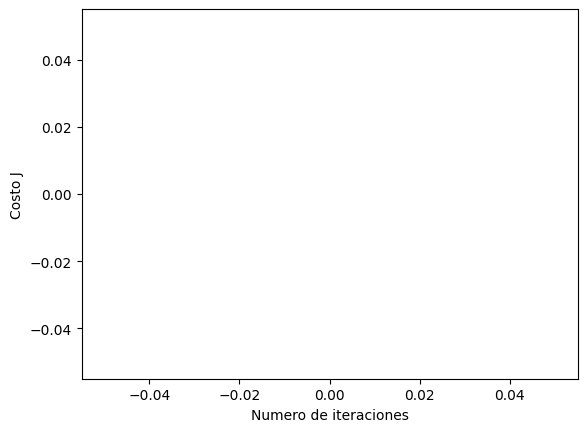

In [15]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 100

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(30)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
